In [1]:
import copy
import glob
import os
import shutil
import time

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

data_path = "C:/Choongnam/pytorch/data/catanddog/train"

transform = transforms.Compose(
    [
        transforms.Resize([256, 256]),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

train_dataset = torchvision.datasets.ImageFolder(
    data_path,
    transform=transform,
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


print(len(train_dataset))

# samples, labels = train_loader._get_iterator()._next_data()
# classes = {0: "cat", 1: "dog"}
# fig = plt.figure(figsize=(16, 24))
# for i in range(24):
#     fig.add_subplot(4, 6, i + 1)
#     plt.title(classes[labels[i].item()])
#     plt.axis("off")
#     plt.imshow(np.transpose(samples[i].numpy(), (1, 2, 0)))
# plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)
# plt.show()

resnet18 = models.resnet18(pretrained=True)


def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False


set_parameter_requires_grad(resnet18)
resnet18.fc = nn.Linear(512, 2)

for name, param in resnet18.named_parameters():
    print(name)
print("requires_grad 가 True 인 layer:-----------")
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name)

model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(model)

385


c:\Users\admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.we

In [2]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()
    acc_history =[]
    loss_history=[]
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs-1}')
        # print('----------')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0
        
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        
        print(f'Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc
        
        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        torch.save(model.state_dict(), os.path.join(data_path, '{0:0=2d}.pth'.format(epoch)))
        print()
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best Acc: {best_acc:4f}')
    return acc_history, loss_history

In [3]:
params_to_update = []
for name, param in resnet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print('\t', name)

optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.4544 Acc: 0.8182

Epoch 1/12
----------
Loss: 0.3135 Acc: 0.8623

Epoch 2/12
----------
Loss: 0.2604 Acc: 0.8987

Epoch 3/12
----------
Loss: 0.2389 Acc: 0.9221

Epoch 4/12
----------
Loss: 0.2311 Acc: 0.8987

Epoch 5/12
----------
Loss: 0.2401 Acc: 0.9091

Epoch 6/12
----------
Loss: 0.2743 Acc: 0.8753

Epoch 7/12
----------
Loss: 0.2754 Acc: 0.8753

Epoch 8/12
----------
Loss: 0.2083 Acc: 0.9247

Epoch 9/12
----------
Loss: 0.1855 Acc: 0.9247

Epoch 10/12
----------
Loss: 0.1770 Acc: 0.9221

Epoch 11/12
----------
Loss: 0.1841 Acc: 0.9221

Epoch 12/12
----------
Loss: 0.2320 Acc: 0.8831

Training complete in 6m 19s
Best Acc: 0.924675


In [5]:
test_path = "C:/Choongnam/pytorch/data/catanddog/test"

transform = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ]
)
test_dataset = torchvision.datasets.ImageFolder(root=test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, num_workers=1, shuffle=True)

print(len(test_dataset))

98


In [6]:
def eval_model(model, dataloaders, device):
    since = time.time()
    acc_history =[]
    best_acc = 0.0
    
    saved_models = glob.glob( "C:/Choongnam/pytorch/data/catanddog/train" + '*.pth')
    saved_models.sort()
    print('saved_model', saved_models)
    
    for model_path in saved_models:
        print('Loading model', model_path)
        
        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0
        
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            with torch.no_grad():
                outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            running_corrects += preds.cpu().eq(labels.cpu()).int().sum()
            
        epoch_acc = running_corrects.double()/len(dataloaders.dataset)
        print(f'Acc: {epoch_acc:.4f}')
        if epoch_acc > best_acc:
            best_acc = epoch_acc
        acc_history.append(epoch_acc.item())
        print()
        
    time_elapesed = time.time() - since
    print(f'Validation complete in {time_elapesed//60:.0f}m {time_elapesed%60:.0f}s')
    print(f'Best Acc: {best_acc:4f}')
    return acc_history

In [7]:
val_acc_list = eval_model(resnet18, test_loader, device)

saved_model []
Validation complete in 0m 0s
Best Acc: 0.000000


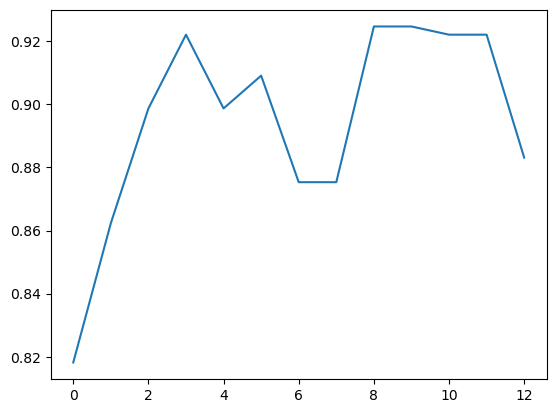

In [8]:
plt.plot(train_acc_hist) # 파란색
plt.plot(val_acc_list) # 주황색
plt.show()

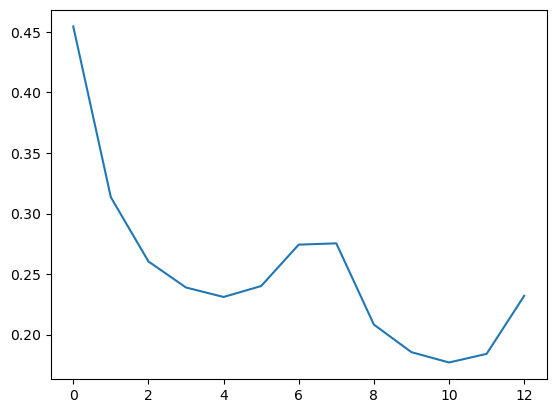

In [9]:
plt.plot(train_loss_hist)
plt.show()


In [10]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1,2,0)
    image = image * (np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)))
    image = image.clip(0,1)
    return image

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


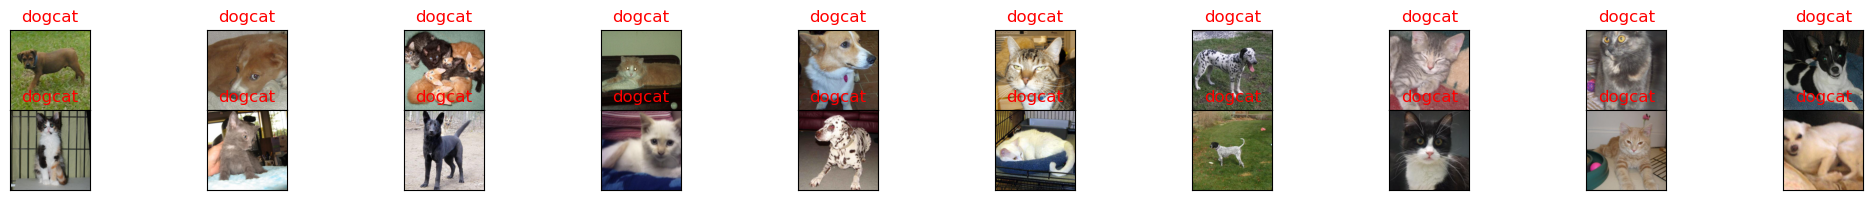

In [11]:
classes = {0:'cat', 1:'dog'}

dataiter = test_loader._get_iterator()
images, labels = dataiter._next_data()
output = model(images)
_, preds = torch.max(output, 1)

print(preds)

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(f"{classes[preds[idx].item()]}{classes[labels[idx].item()]}", color=("green" if preds[idx]==labels[idx] else "red"))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)
plt.show()